## 【課題1】データの取得
irisデータセット読み込みましょう。  
データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。  
列の名前も以下を参考にしてください。

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
data = load_iris()
type(data)

sklearn.utils.Bunch

In [3]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X = pd.DataFrame(data.data, 
        columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = pd.DataFrame(data.target, columns=['Species'])
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## 【課題2】データの結合
これらX,yを結合させたDataFrame型変数dfを作成してください。  
これ以降はこのdfを使っていきます。

In [6]:
df = pd.concat([X, y], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 【課題3】データの確認
今回扱うデータがどのようなものなのか改めて確認します。  
少なくとも以下の4点についてコードとマークダウンを組み合わせてレポートしてください。  
- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [7]:
#先頭から4番目までのサンプルを表示する
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


**各特徴量は全て数値データ**

In [8]:
df.count?

In [9]:
#ラベルごとのサンプル数をカウントする
df.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

**各ラベルのサンプル数は50**

In [9]:
#欠損値をカウントする
df.isnull().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

**欠損値なし**

In [10]:
#各特徴量の平均値、標準偏差、四分位数を表示する
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


## 【課題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

1936年の論文で英国の統計学者・植物学者であったロナルド・フィッシャー氏が発表した多変量データ。  
データセットは、アイリスの花の3種類(Iris setosa, Iris virginica, Iris versicolor) を各々50サンプルずつ集めた計150のデータからなる。  
特徴量は、がく片の長さと幅、花びら長さと幅をcmで計測した4つからなる。

## 【課題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。
- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する

In [11]:
#sepal_widthの列を抽出する
df['sepal_width']
df.loc[:,'sepal_width']
df.loc[:, [False, True, False, False, False]]  # pd.DataFrame型になる
df.iloc[:, 1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [12]:
#50番目から99番目までのデータを抽出
df.iloc[50:100, :]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [13]:
#petal_lengthの50番目から99番目までのデータを抽出
df.loc[50:100, 'petal_length']

50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
56     4.7
57     3.3
58     4.6
59     3.9
60     3.5
61     4.2
62     4.0
63     4.7
64     3.6
65     4.4
66     4.5
67     4.1
68     4.5
69     3.9
70     4.8
71     4.0
72     4.9
73     4.7
74     4.3
75     4.4
76     4.8
77     5.0
78     4.5
79     3.5
80     3.8
81     3.7
82     3.9
83     5.1
84     4.5
85     4.5
86     4.7
87     4.4
88     4.1
89     4.0
90     4.4
91     4.6
92     4.0
93     3.3
94     4.2
95     4.2
96     4.2
97     4.3
98     3.0
99     4.1
100    6.0
Name: petal_length, dtype: float64

In [14]:
#petal_widthの値が0.2のデータを抽出
df['petal_width'][df.petal_width==0.2]

0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
7     0.2
8     0.2
10    0.2
11    0.2
14    0.2
20    0.2
22    0.2
24    0.2
25    0.2
27    0.2
28    0.2
29    0.2
30    0.2
33    0.2
34    0.2
35    0.2
36    0.2
38    0.2
39    0.2
42    0.2
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal_width, dtype: float64

**pd.DataFrme.loc**
>indexやcolumnのラベルを用いてデータにアクセスできる。  
また、boolean arrayを用いることができる。  

**pd.DataFrame.iloc**
>indexの番号 (0 ~ length-1) または boolean arrayを用いることができる。

## 【課題6】図の作成
データは可視化して確認することが大切です。図を作成していきましょう。Matplotlibやseabornを使ってください。
- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つ選び、boxplotを使ってラベルごとのデータの分布を可視化する
- 特徴量を一つ選び、violinplotを使ってラベルごとのデータの分布を可視化する

boxplotとviolinplotは似た図を表示します。これらはどう違い、それぞれどのような利点があるのか説明してください。

In [15]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
count_species = df.Species.value_counts()

In [17]:
type(count_species)

pandas.core.series.Series

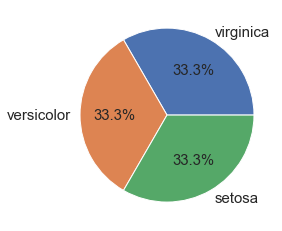

In [18]:
#円グラフの作成
plt.pie(count_species.values, autopct='%.1f%%',labels=['virginica', 'versicolor', 'setosa'],
       textprops={'size': 15});

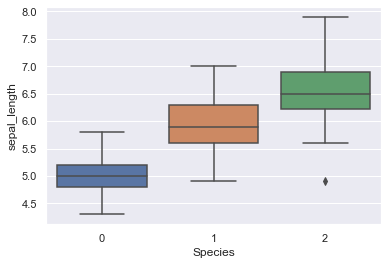

In [19]:
#boxplotの作成
sns.boxplot(df['Species'], df['sepal_length']);

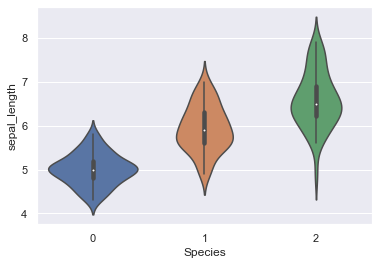

In [20]:
#violinplotの作成
sns.violinplot(x='Species', y='sepal_length', data=df);

**boxplotとviolinplotの違い**
>boxplotは最小値、最大値、四分位値がわかる。  
violinplotは各値の分布がわかる。

## 【課題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。
- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

In [21]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'],
      dtype='object')

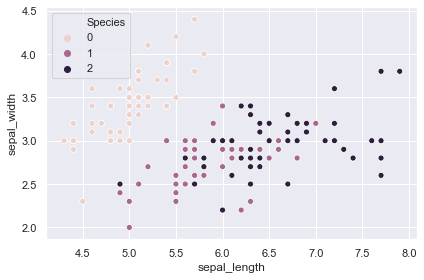

In [23]:
#種類ごとに色分けした散布図を作る
sns.scatterplot(df.sepal_length, df.sepal_width, hue=df.Species)
plt.tight_layout()
plt.show();

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


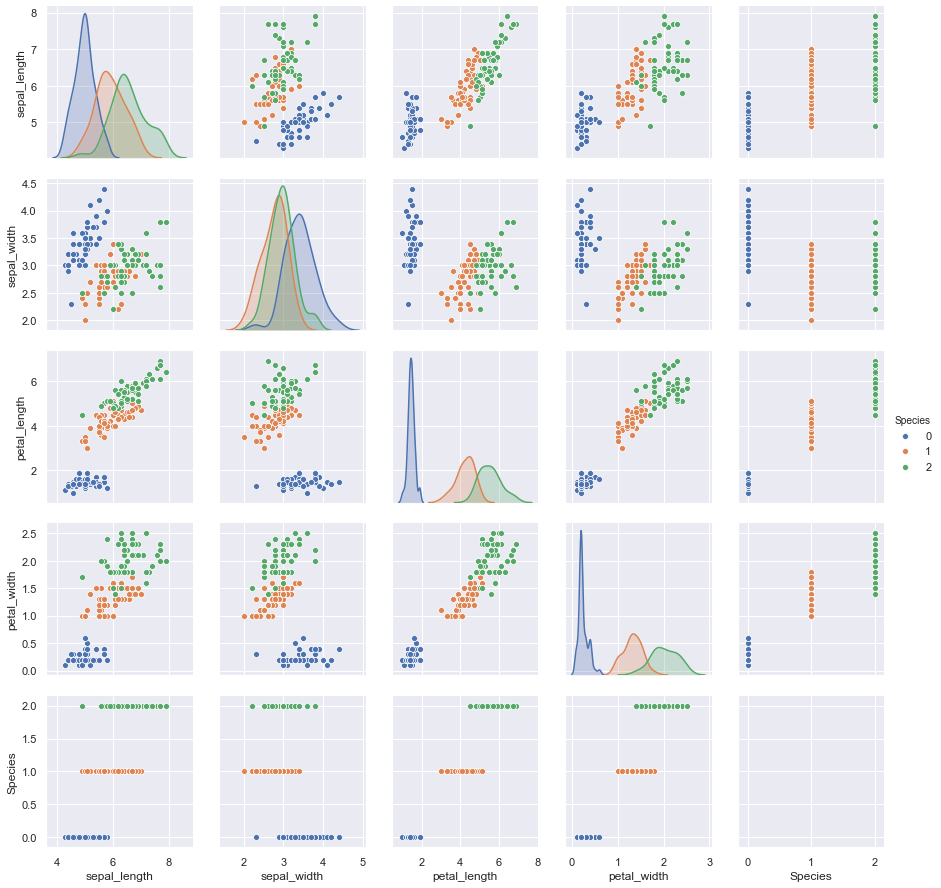

In [24]:
#散布図行列を作る
sns.pairplot(df, hue='Species');

In [25]:
#相関行列を作る
corr_matrix = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


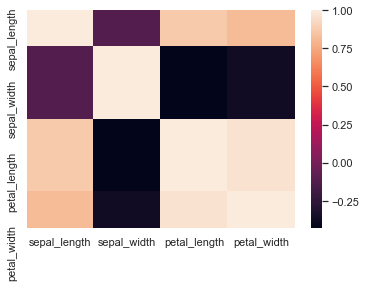

In [26]:
#相関行列のヒートマップを作る
sns.heatmap(corr_matrix);

## 【課題8】簡単な考察

\'setosa\'はpetal_lengthとpetal_widthから精度良く分類できそう。  
\'versicolor\'と\'virginica\'については、sepal_length, petal_length, petal_widthがいずれも\'versicolor\' \< \'virginica\'という傾向を利用して分類するのが良さそう。